# Working with Financial Data

In this note, we will learn how to work with financial data. Our goal is twofold. First, we will learn the mechanics and syntax of working with data in `python` -- which command does what, and what code you need to write to produce a certain analysis or make a certain plot. Second, we will learn a _data workflow_, which is an overall approach to importing, arranging, modifying, analyzing, and visualizing data that is not specific to a particular programming language.

We will accomplish all of this by following an example. Our goal will be to assess the historical stock performance of several large companies, and then to see whether this performance is explained well by the **Capital Asset Pricing Model (CAPM)** that you learned in your investments class.

But first things first. Earlier, we learned about various libraries that we use to accomplish certain things in `python`. For working with data, our go-to library will be `pandas`, commonly abbreviated to ("aliased" as) `pd`. This library will provide us with two _data structures_ -- `Series` and `DataFrame`. We can think of them as being `pandas` analogs to vectors and matrices from `numpy`, but with some extra bells and whistles (e.g. row and column labels, ability to store non-numeric and missing data, etc.) that make them better suited for working with data.

Let's import the library.


In [1]:
import pandas as pd

Broadly speaking, data can come from three sources. First, and least commonly, we can enter data directly in our code. Second, we can import data from a file, whether stored locally on our computer or on some server elsewhere. There are many formats in which data can be stored in a file. The most common and widely compatible format for tabular data (i.e. tables) is comma-separated values (CSV) files, which are regular text files which use commas to separate columns and line-breaks to separate rows. Third, we can import data from a remote source (e.g. a website). Many data providers make data available through interfaces especially designed for computers to access them programmatically (through a program) as opposed for users to access them interactively (i.e. by visiting a website in a web browser). These interfaces are called Application Programming Interfaces (APIs) and instructions for how to use them vary from provider to provider.

Later on, we will explore importing financial and economic data using a few common APIs. But for now, let's focus on the second method -- importing data from a CSV file.

## Importing Data

We will import monthly stock prices and associated information for Microsoft, ticker MSFT:


In [2]:
df = pd.read_csv('data/MSFT.csv')
type(df)

pandas.core.frame.DataFrame

In the command above, we imported data in file `MSFT.csv` in subfolder `data`, and stored it in a variable called `df`. We chose this name b/c it's short for `DataFrame` (the type of data structure `pandas` created) and is a common name for variables containing imported data. Let's learn more about this dataframe:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        264 non-null    object 
 1   open             264 non-null    float64
 2   high             264 non-null    float64
 3   low              264 non-null    float64
 4   close            264 non-null    float64
 5   adjusted close   264 non-null    float64
 6   volume           264 non-null    int64  
 7   dividend amount  264 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 16.6+ KB


The `info()` method gives us some useful summary information about the structure of the table. We've learned that it has 264 rows (which we call observations in statistics) and 8 columns (variables, in statistics). Most columns contain floating-point (decimal) numbers, but the `volume` column contains integers and `timestamp` contains data of type `object`. None of the data is missing or `null`. Let's now take a look at the data itself. Just the first few rows (or the "head" of the table) is enough to get an idea of what the data looks like. We certainly don't want to print all of it.


In [4]:
df.head()

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00
1,2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00
2,2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00
3,2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56
4,2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00


For every month indicated by the `timestamp` column and seemingly in recent-first order, we have Microsoft's open (beginning of the month), high (highest that month), low (lowest that month), and close (end of the month) prices. We also see volume (number of shares traded) and dividend paid, as well as a column called `adjusted close`, which we will discuss later. This type of data is often called OHLC (Open, High, Low, Close) and is the most common format for historical stock prices.

Note the first column that numbers our rows from 0 onwards. This is the _index_ of the dataframe. By default, `pandas` uses the row number. But if there is a column or set of columns that **uniquely** identifies the row, perhaps it would be a better index, because it is more descriptive than just the initial row number. Here, such a column is `timestamp`, which identifies the calendar month of the stock prices in that row. We can make `timestamp` the index (semi-column is just so t


In [5]:
df.set_index("timestamp")

,open,high,low,close,adjusted close,volume,dividend amount
timestamp,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00
2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00
2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00
2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56
2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00
...,...,...,...,...,...,...,...
2000-04-28,94.4400,96.50,65.00,69.75,22.1056,1129073300,0.00
2000-03-31,89.6200,115.00,88.94,106.25,33.6734,1014093800,0.00
2000-02-29,98.5000,110.00,88.12,89.37,28.3237,667243800,0.00


Alternatively, we can set the index right away when importing the data:


In [6]:
df = pd.read_csv("data/MSFT.csv", index_col="timestamp")


Now, when we display the dataframe's info, we see fewer columns (7 instead of 8) and the Index range now gives us more useful information -- that our monthly stock prices range from December 1999 to November 2021.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 2021-11-05 to 1999-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             264 non-null    float64
 1   high             264 non-null    float64
 2   low              264 non-null    float64
 3   close            264 non-null    float64
 4   adjusted close   264 non-null    float64
 5   volume           264 non-null    int64  
 6   dividend amount  264 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.5+ KB


## Accessing Data

There are multiple ways to access data in a dataframe. Like for a `numpy` `ndarray`, we can use row and column indices. For instance, to select the first two rows and second through third columns, we would index as follows (note the use of the `iloc` property. Try to index without it like you would an array, and see what happens).


In [8]:
df.iloc[0:2, 1:3]


,high,low
timestamp,,
2021-11-05,338.79,326.37
2021-10-29,332.00,280.25


But one of the main benefits of using dataframes is that we can refer to rows and columns not by their ordinal numbers (first, third, etc.), but by the index and column name:


In [9]:
df.loc[['2021-11-05', '2021-10-29'], ['open', 'close']]


,open,close
timestamp,,
2021-11-05,331.3550,336.06
2021-10-29,282.1217,331.62


Now that we refer to rows and columns by their name, we use `loc` instead of `iloc`.

Notice that both times, because we wanted multiple rows and multiple columns, the data structure returned was also a DataFrame. Suppose we only want one column. We have a choice in how we want this column to be returned. If we still want a dataframe, we will request the output column as a list `['open']` containing just one element -- the column we want:


In [10]:
df.loc[['2021-11-05', '2021-10-29'], ['open']]


,open
timestamp,
2021-11-05,331.3550
2021-10-29,282.1217


What if we left off the square brackets `[` and `]`?


In [11]:
s = df.loc[['2021-11-05', '2021-10-29'], 'open']
print(s)
type(s)

timestamp
2021-11-05    331.3550
2021-10-29    282.1217
Name: open, dtype: float64


pandas.core.series.Series

The `print()` function just prints `s`, and the `type()` command returns the data structure type. As you can see, this is no longer a `DataFrame` but a `Series`, the univariate data structure supplied by `pandas`. While `Series` only have one column while `DataFrames` can (but don't necessarily have to, as we saw above) have multiple columns, in practice the two data structures are very similar. Most methods that work for one work for another. One difference is that if we want to refer to rows by their number, we can do so directly for a `Series` whereas we have to use the `iloc` property for a `DataFrame`. But as you can see, this is a fairly minor difference.


In [12]:
df.loc[:, 'open'][0:3]


timestamp
2021-11-05    331.3550
2021-10-29    282.1217
2021-09-30    302.8650
Name: open, dtype: float64

One other convenient shorthand. If your column names do not contain spaces, you can retrieve one column at a time using the dot notation


In [13]:
df.open[0:3]

timestamp
2021-11-05    331.3550
2021-10-29    282.1217
2021-09-30    302.8650
Name: open, dtype: float64

`df.open` is a litte easier to type than `df['open']` but, because it requires no spaces in column names, less flexible. So to be consistent, I recommend you stick with the `['open']` notation.

In the examples above, we resricted both rows and columns i.e. we always selected some but not all rows, and some but not all columns. If we want all rows and some columns (i.e., entire columns), there is a convenient shorthand that avoids the `loc` property:


In [14]:
subdf = df[['open', 'close']]
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 2021-11-05 to 1999-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    264 non-null    float64
 1   close   264 non-null    float64
dtypes: float64(2)
memory usage: 14.3+ KB


returns a dataframe with all original rows but only the two requested columns. As before, if we only want closing prices, we can obtain it as a `DataFrame` `df[['close']]` or as a `Series` `df['close']`.

If instead we wanted entire rows, i.e. some rows and all columns, we can use the `loc` property as before, but this time we can omit column names:


In [15]:
df.loc[['2021-11-05', '2021-10-29']]


,open,high,low,close,adjusted close,volume,dividend amount
timestamp,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.06,120621826,0.0
2021-10-29,282.1217,332.00,280.25,331.62,331.62,516523658,0.0


But we don't have to. You can confirm that `df.loc[['2021-11-05','2021-10-29'],:]` produces the same result.

If we only wanted one row, we again have a choice between returning it as a DataFrame and returning it as a Series:


In [16]:
type(df.loc['2021-11-05'])

pandas.core.series.Series

In [17]:
type(df.loc[['2021-11-05']])

pandas.core.frame.DataFrame

One last note on referencing data in a dataframe. Often, we ultimately part of a dataframe -- for example, a few columns, a single column, or even a single value -- in a more familiar format. Instead of a `pandas` dataframe or a series, we may want a `numpy` array or, in the case of a single value, the value itself as a primitive type (e.g. double). We can get this using the `.values` attribute.


In [18]:
df.loc[['2021-11-05', '2021-10-29'], ['open', 'close']].values


array([[331.355 , 336.06  ],
       [282.1217, 331.62  ]])

The two rows and two columns of the dataframe have been extracted as a 2x2 array, which we can then index like we index any numpy array.


In [19]:
df.loc[['2021-11-05', '2021-10-29'], ['open', 'close']].values[1, 0]


282.1217

## Dates

So far, we have made the `timestamp` column the `index` of our dataframe, and have selected rows based on its value, but we haven't discussed its type. You may remember that when we requested the dataframe's `info()`, we found the `timestamp` to be of type `object`. Let's see what the type of an individual element of this column is:


In [20]:
type(df.index[1])

str

It's a `str`ing of text. This is why we have always been putting it in quotes (by the way, it doesn't matter if you use single or double quotes as long as you're consistent). This is not the most helpful way to store dates since it doesn't allow us to perform any calculations using them. For instance, we may want to know the month of a given date, or find what date was two weeks earlier, or check if the date is after, say, December 31, 2010. To perform these calculations, we first need to make `python` aware that the index represents date information by converting, or _parsing_, it into the appropriate data type.


### Creating Dates

We do this using `pandas`'s `to_datetime()` class method, supplying it with the variable containing string dates.

Usually, it can figure out the format of the original text date on its own. If it does not -- perhaps because the date is stored in some unusual way -- we need to supply a description of the _format_, in which these dates are stored. In other words, we need to "teach" the `to_datetime()` function that '2021' in '2021-10-29' refers to the year, '10' refers to the month, '29' refers to the date, and the dashes '-' don't mean anything and are just visual separators. The specific way in which this format is specified dates back to the C language and isn't very intuitive, so it's handy to keep the following reference around: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes.

Thankfully, our dates are stored in a fairly standard year-month-date format, so we can let `pandas` figure it out, and just check afterwards that it worked.


In [21]:
df.index = pd.to_datetime(df.index)
df.index[0]

Timestamp('2021-11-05 00:00:00')

The dates are now stored in `pandas` `Timestamp` type.

When dates are easy to parse, we can even ask `pandas` to do it right away when importing:


In [22]:
df = pd.read_csv("data/MSFT.csv", index_col="timestamp", parse_dates=True)
df.head()

,open,high,low,close,adjusted close,volume,dividend amount
timestamp,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00
2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00
2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00
2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56
2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00


Of course, if we wanted to create a `Timestamp` from a particular date that we know, we can do that directly as well. As long as we use a reasonable format, `pandas` will figure it out.


In [23]:
pd.to_datetime('2021-10-15')

Timestamp('2021-10-15 00:00:00')

In [24]:
pd.to_datetime('October 11, 2021')

Timestamp('2021-10-11 00:00:00')

Let's consider one example where things aren't as simple. What if we wrote that last date as 10/11/2021? American users instantly understand this to be October 11, 2021. But European users would interpret it as November 10, 2021. Which one does `pandas` use?


In [25]:
pd.to_datetime('10/11/2021')

Timestamp('2021-10-11 00:00:00')

The American format, it seems. But would this still be the case if I was using a computer configured in Europe? To be honest, I'm not sure. So if you know that you have a European dataset and dates are written with the day first, tell `pandas` the day-first convention explicitly by setting the `dayfirst` argument of `to_datetime()` to `true`:


In [26]:
pd.to_datetime('10/11/2021', dayfirst=True)


Timestamp('2021-11-10 00:00:00')

Occasionally, you have dates stored as separate columns/variables of year, month, and day. If it's just one date, easiest way to create a `Timestamp` would be to use its constructor `Timestamp()`:


In [27]:
yr = 2021
mo = 10
d = 11
pd.Timestamp(yr, mo, d)


Timestamp('2021-10-11 00:00:00')

If there are multiple dates, we can use `to_datetime()` with the exact syntax depending on how the dates are stored. If they are stored in separate lists or arrays,


In [28]:
yr = [2021, 2021]
mo = [10, 9]
d = [11, 8]
pd.to_datetime({'year': yr, 'month': mo, 'day': d})

0   2021-10-11
1   2021-09-08
dtype: datetime64[ns]

If they are stored as columns in a dataframe **with names year, month, day**, it's easier. To illustrate, I will first add columns to our dataframe `df` for year, month, and day, and then reconstruct the original date from that column:


In [29]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,year,month,day
timestamp,,,,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00,2021,11,5
2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00,2021,10,29
2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00,2021,9,30
2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56,2021,8,31
2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00,2021,7,30


In [30]:
df['datecheck'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,year,month,day,datecheck
timestamp,,,,,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00,2021,11,5,2021-11-05
2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00,2021,10,29,2021-10-29
2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00,2021,9,30,2021-09-30
2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56,2021,8,31,2021-08-31
2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00,2021,7,30,2021-07-30


We can see that `datecheck` is the same as the index `timestamp` so the creation of dates from year, month, and day worked correctly.

Observe that, along the way, we learned two new things. First, we saw that it's very easy to obtain particular information about a date once we've stored it as a `Timestamp`. We were able to obtain the dates' years, months, and days just by referring to the relevant _attributes_ `year`, `month`, and `day`. There are many other attributes e.g. `quarter`, `week`, `dayofweek`, etc. See the documentation for details: https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Second, we learned how to add new columns to the dataframe. For example, in `df['year'] = df.index.year`, we took the series `df.index.year` and stored in dataframe as a new column named `year`.

There are two more things we can do with dates.

### Converting Dates to Text

Above, we saw how to convert text to dates. What about going the other way around? Displaying dates as text is useful for embedding them in your output and controlling precisely how they are displayed. For example, suppose wanted to print a sentence that said "The second most recent month in our dataset is October 2021." Of course, we want the sentence to be true even if we use a different dataset, in which the second most recent month is no longer October 2021, so we want that part of the sentence to be _dynamic_ (that is, determined when we run the program).


In [31]:
second_date = df.index[1]
print('The second most recent month in our dataset is ' +
      second_date.strftime('%B %Y'))


The second most recent month in our dataset is October 2021


Here, we retrieved the second date from the dataframe (recall: Python starts counting at zero, so `[1]` refers to the second element). It is stored as a `pandas` `Timestamp`. To convert it to string, we used its `strftime()` method and specified the format. `%B` refers to the long text month (`%b` would be a three-letter month like "Oct") and `%Y` refers to the 4-digit year (`%y` would be the 2-digit year). Finally, we combine the two strings together -- the initial part of the sentence and the dynamic date -- and print.

As we've said before, these format codes are not the most intuitive, so keep this reference handy: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes.

### Date Comparisons & Arithmetic

Finally, we can perform some date comparisons arithmetic such as determining whether one date is before another, finding the number of days between two dates, adding a week to a date, etc. Here are a few examples. Let's create a new column indicating whether the date is after October 11, 2021.


In [32]:
df['recent'] = df.index > pd.Timestamp(2021, 10, 11)
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,year,month,day,datecheck,recent
timestamp,,,,,,,,,,,,
2021-11-05,331.3550,338.79,326.37,336.06,336.0600,120621826,0.00,2021,11,5,2021-11-05,True
2021-10-29,282.1217,332.00,280.25,331.62,331.6200,516523658,0.00,2021,10,29,2021-10-29,True
2021-09-30,302.8650,305.32,281.62,281.92,281.9200,502931199,0.00,2021,9,30,2021-09-30,False
2021-08-31,286.3600,305.84,283.74,301.88,301.8800,440360333,0.56,2021,8,31,2021-08-31,False
2021-07-30,269.6100,290.15,269.60,284.91,284.3623,522303043,0.00,2021,7,30,2021-07-30,False


Take a look at the last column `recent`. It has a value of `True` for the two most recent days, and `False` otherwise, because only the two most recent days are after 10/11/2021. These comparisons will come in handy when we filter data.

Next, let's find the difference between the first and second date in `df`:


In [33]:
df.index[0] - df.index[1]

Timedelta('7 days 00:00:00')

Note the type of this result -- it's a `Timedelta`. While `Timestamp` represents dates in a flexible way (such that we can obtain their year, month, week, etc.), `Timedelta` contains a flexible representation of duration i.e. the amount of time that passes between two dates. This is useful in some cases, but for our applications, we usually will want this information as a simple number e.g. as number of days. We can obtain it as follows:


In [34]:
(df.index[0] - df.index[1]).days

7

Likewise, we can find the date corresponding to, say, 15 days, after the most recent date in our sample:


In [35]:
df.index[0] + pd.Timedelta(days=15)

Timestamp('2021-11-20 00:00:00')

Now that we've seen what works, let's talk about what doesn't. `df.index[0] + 15` gives an error because `pandas` doesn't know what "15" means -- is it days, seconds, or something else? `pd.Timedelta(days=15)` makes the unit of the time interval clear. `pd.Timedelta(months=2)` doesn't work either. The longest unit available to `Timedelta` is a day because larger units are ambiguous. Months can have 28, 30, or 31 days. Years can have 365 or 366 days. So it is unclear what specific time interval you mean if you say "1 month."

These are just a few examples of operations with dates. Plenty of other use cases come up e.g. finding the number of business or trading days between two dates, determining the fraction of bond interest accrued between two dates based on the bond's day count conventions, etc. These are more specialized, and slightly more difficult, cases to handle, so we won't explicitly cover them in class. But the introduction above should put you in a position to Google whatever you need.

Now that our dates are in good shape, let's proceed to plotting our data.

## Plotting with `Matplotlib`

Before transforming data or performing any analysis, it's always a good idea to make a few plots. These don't have to be "publication-quality" plots that go into your report, presentation, etc. These are just a quick way for you to get familiar with the data and spot anything unusual, which affects your intepretation or requires additional research and attention.

There are many libraries to make plots in `python`, but the most common one is `matplotlib`. So let's import it:


In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

We use the common alias `mpl` for `matplotlib`. Additionally, we import its sublibrary `pyplot` that handles a lot of the actual plotting directly using the alias `plt`. This second step is optional. We could skip it. Then, to run a particular plotting method (e.g. `plot()`), we would type `mpl.pyplot.plot()`. But since we will use `pyplot`'s methods often, it saves a bit of typing when we can do `plt.plot()` instead.

Let's plot the monthly closing prices (`close` column) on the y-axis and the dates (`df.index`) on the x-axis.


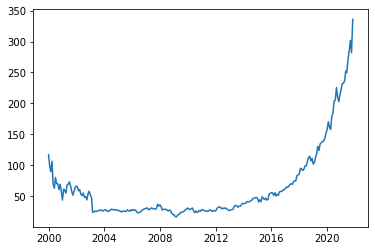

In [37]:
plt.plot(df.index, df['close'])
plt.show()

The `plot()` method takes two arguments -- a set of x coordinates and a set of y coordinates -- and constructs a plot `object`. I use the word "set" loosely here. It can be a `python` list, a `numpy` one-dimensional ndarray, or a `pandas` series. You can check that `plot()` works with all of this by converting the `pandas` objects `df.index` index or the `df['close']` series to a `numpy` array using `.to_numpy()` or to a `python` list using `.tolist()`. For example, try `plt.plot(df.index.to_numpy(), df['close'].tolist())`. You will get the same result.

The `show()` method displays this object. Why would you ever want to construct a plot but not show it? Maybe because your goal is to print many graphs to a file e.g. a PDF and you don't want your program to litter your screen with dozens of plot windows as it runs.

By itself, this graph means nothing. To help someone understand what it is plotting, let us specify a title and axis labels.


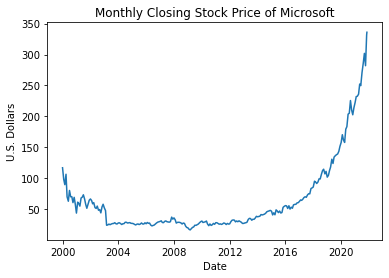

In [38]:
plt.plot(df.index, df['close'])
plt.title('Monthly Closing Stock Price of Microsoft')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.show()

Let's also plot the opening price.


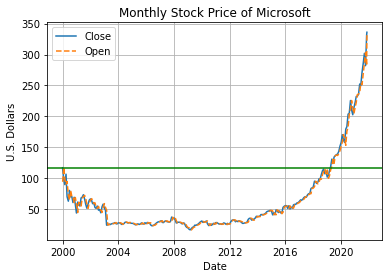

In [39]:
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['open'], '--', label='Open')
plt.axhline(y=df.loc[min(df.index) == df.index, 'close'].values[0], color='g')
plt.title('Monthly Stock Price of Microsoft')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

We plotted two different lines on the same set of axes by issuing two `plot()` commands. Each line received a `label`, which we then displayed using the `legend()` method in the upper-left-hand corner of the plot. We turned on grid lines. For the `open` plot, we also changed its line style from the default solid to a dashed line by specify `'--'` as the third argument.

The most interesting line is probably `plt.axhline(y=df.loc[min(df.index)==df.index,'close'].values[0],color='g')`, which plots a horizontal green line at the level of the earliest closing price to help us compare subsequent prices with the first one.

Let's examine this line closely. The `axhline()` method draws a horizontal line at a level specified by the value of the `y` argument. Its green color is given by the `color='g'` argument. To identify the closing price at the start of the dataset, we have several options. Recall that earlier we noticed that the data seemed to be in reverse order, with most recent observations first. We could assume that this is indeed true, in which case the last row of the data would be earliest, so we could have defined `y` to be `df['close'][-1]`. But this is not a good idea, because we have not done anything to make sure that the data is indeed sorted in reverse order, so we are effectively relying on the data provider to supply the data in a certain order.

It's more robust to select the closing price that explicitly corresponds to the earliest date i.e. to select the value of `close` in the row whose date index is equal to the earliest date, or the minimum of all the dates. We select this value with


In [40]:
df.loc[min(df.index) == df.index, 'close']


timestamp
1999-12-31    116.75
Name: close, dtype: float64

Note that the result of this operation is a `pandas` Series object, while `axhline()` expects a number. To extract the number (the "116.75"), we extract its values as a `numpy` array, and then retrieve its first (and only) element.


In [41]:
df.loc[min(df.index) == df.index, 'close'].values[0]


116.75

These are just a few things you can do with `matplotlib` and `pyplot`. To see many other examples of plots and borrow some of the code to adapt to your own needs, see the `plotting.ibnyb` Jupyter Notebook.

Now that we've learned the mechanics of plotting, let's ponder the plot itself. One thing looks strange. Look at 2003 or so. Why did Microsoft's stock price drop so much? Let's zoom in a little further by plotting just the couple of years around then.

## Filtering and Sorting

To examine what happened with Microsoft's stock in 2003 more closely, let's plot only the stock prices in that year. In other words, let's _filter_ the data to only 2003 dates. We can do this using logical indexing, where we pass an array of `True`s and `False`s as indices to a series so that `pandas` selects only the elements corresponding to `True`.

There are several ways to construct this filter. Here, since the date range in which we are interested contains the entire year, we can do


In [42]:
filter_year = df.index.year == 2003
df.index[filter_year]

DatetimeIndex(['2003-12-31', '2003-11-28', '2003-10-31', '2003-09-30',
               '2003-08-29', '2003-07-31', '2003-06-30', '2003-05-30',
               '2003-04-30', '2003-03-31', '2003-02-28', '2003-01-31'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

Alternatively, and more generically (i.e. done in a way that accomodates a wider variety of use cases), we can select dates that are between January 1, 2003 and December 31, 2003 inclusively.


In [43]:
filter_daterange = (df.index >= pd.Timestamp(
    2003, 1, 1)) & (df.index <= pd.Timestamp(2003, 12, 31))
df.index[filter_daterange]

DatetimeIndex(['2003-12-31', '2003-11-28', '2003-10-31', '2003-09-30',
               '2003-08-29', '2003-07-31', '2003-06-30', '2003-05-30',
               '2003-04-30', '2003-03-31', '2003-02-28', '2003-01-31'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

We can use either `filter_year` or `filter_range` to plot only the 2003 observations.


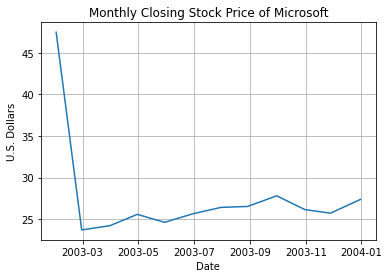

In [44]:
plt.plot(df.index[filter_year], df.loc[df.index[filter_year], 'close'])
plt.title('Monthly Closing Stock Price of Microsoft')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.grid(True)
plt.show()

Hmm, let's revise our filter to grab a few months at the end of 2002 to see the context for this drop better.


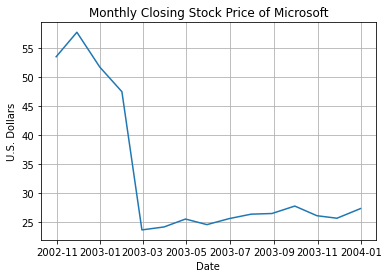

In [45]:
filter_dates = df.index[(df.index >= pd.Timestamp(2002, 10, 1))
                        & (df.index <= pd.Timestamp(2003, 12, 31))]
plt.plot(filter_dates, df.loc[filter_dates, 'close'])
plt.title('Monthly Closing Stock Price of Microsoft')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.grid(True)
plt.show()

We did a few things differently the second time around. First, rather than storing a vector of `True`s and `False`s in the filter variable, we stored the dates (as `pandas` indices) directly. This made the `plot()` command simpler because we can plot `filter_dates` directly as x-values and, because we mades dates `df`'s index earlier, we can pass them to `.loc()` to extract the corresponding closing prices directly. This is a good example of how useful indices can be for filtering.

Back to the plot. It seems that over the course of February 2002, Microsoft's stock price fell from about 48 to about 24. Microsoft stock price halved. Did the company really lose half its value? Seems unlikely. What is more likely is that it underwent a 2-for-1 split. In other words, the company gave all existing shareholders 2 new shares worth \\$24 in exchange for 1 old share worth \\$48. Do we want this reflected as a big drop in the stock price in our graph? If all we want to plot is the level of the stock price, sure. But usually, the point of working with stock prices is looking at which investments performed well and which performed poorly. An investment in Microsoft did not
lose half its value in February 2003. It was just redenominated. If I gave you two \\$10 bills in exchange for one \\$20, you did not lose \\$10, did you?

So what we actually want to plot isn't the headline stock price at the end of the month but rather the increase in value of a hypothetical investment in Microsoft from December 1999 until today. And the history of closing prices does not accomplish this goal because prices go down in response to stock splits and dividends, while the value of one's investment does not.

Thankfully, good data providers of historical stock data include another column, which allow us to plot what we want. Some include a column called "return" or "total return," which represents the increase in the value of the investment between two dates inclusive of splits and dividends. Others _adjust_ the closing price, such that the most recent _adjusted closing price_ is the same as the actual closing price, but past prices are different (usually lower) than what they actually have been, such that the ratio of two consecutive adjusted closing prices represents the total return.

Our dataset follows the latter approach. Let's see how a plot of the adjusted closing price looks like in the 2002-2003 period.


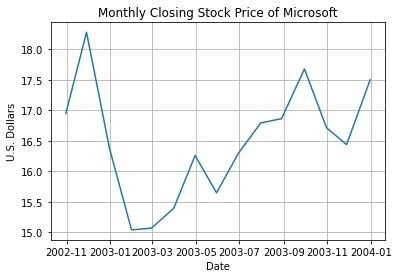

In [46]:
plt.plot(filter_dates, df.loc[filter_dates, 'adjusted close'])
plt.title('Monthly Closing Stock Price of Microsoft')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.grid(True)
plt.show()

No more giant drop! Microsoft's stock split did not cause an appreciable change in the value of our investment.

So now, we will compute returns from the `adjusted close` column, and then _cumulate_ them over time to plot the investment's performance over time.

First, though, let's sort the dataset. To compute returns, we need to divide a given month's `adjusted close` by the previous month's `adjusted close` and it's easier for us to check our work if the prices are in chronological order. We do this using the `sort_values()` method of `DataFrame`.


In [47]:
df.sort_values('timestamp', inplace=True)


`sort_values()` takes at least one argument, which is the name(s) of columns by which we are sorting. Note that here we can still refer to our index by its original column name `timestamp`. Optional arguments allow one to sort ascending (default) or descending, determine whether to collect missing data at the beginning or the end (default), and finally to produce a new dataset (default) or sort the existing one. We don't need to separately keep unsorted and sorted dataset in memory, so we sort it "in-place," meaning we sort the existing dataset. When working with large datasets, performing as many operations "in-place" can significantly speed up your code, keep your computer memory free, and prevent crashes, because it avoids duplicating the dataset.

Let's see how the first few rows of our dataframe look now:


In [48]:
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,year,month,day,datecheck,recent
timestamp,,,,,,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0,1999,12,31,1999-12-31,False
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0,2000,1,31,2000-01-31,False
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0,2000,2,29,2000-02-29,False
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0,2000,3,31,2000-03-31,False
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0,2000,4,28,2000-04-28,False


As expected, we now have the earliest date -- December 31, 1999 -- first.

Let's also get rid of some of the extra columns we've created since won't be needing them:


In [49]:
df.drop(columns=['year', 'month', 'day', 'datecheck', 'recent'], inplace=True)
df.head()

,open,high,low,close,adjusted close,volume,dividend amount
timestamp,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0


We are now ready to compute returns.

## Computing and Analyzing Stock Returns

Recall that the `adjusted close` column is defined such that the ratio of two closing prices represents the gross return between these two dates. For example, the gross return between Dec 31, 1999 and Jan 31, 2000 is the `31.0176 / 37.0012`. This is the return an investor in Microsoft would have received if she bought a share at market close on Dec 31 and held it for the entire month of January until Jan 31. In other words, it is the Jan 2000 monthly return. Similarly, the Feb monthly return is `28.3237 / 31.0176`. Typically, we think in terms of net returns. So, for example, the Jan return would be `31.0176 / 37.0012 - 1`.

We can compute monthly returns for all of our observations, except for the first one. Why not? Well, to get the Dec 1999 return, we'd need to know the Nov 1999 adjusted closing price, and it is not in our dataset. Of course, if Microsoft was publicly traded in Nov 1999, we can find a different data source and look it up, but then we'd have the same problem with the Nov 1999 return -- we would not be able to compute it because we don't have the Oct 1999 closing price, and so on. It is always the case that given a series of $N$ prices, we can compute $N-1$ returns.

This kind of operation naturally lends itself to vectorization because we need to perform the same calculation $N-1$ times. If we were doing this with `numpy` arrays, we would have to think about numeric indices carefully, and then deal with the fact that we have one fewer return than price when storing the result back in the dataframe. But because we've `df.set_index()`, `pandas` lets us not worry about any of that:


In [50]:
df['ret'] = df['adjusted close'] / df['adjusted close'].shift(1) - 1
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,ret
timestamp,,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0,NaN
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0,-0.161714
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0,-0.086851
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0,0.188877
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0,-0.343529


We took the `adjusted close` column and divided it by itself, shifted by one, and stored the result in a new column called `ret`. Note the Dec 1999 value -- `NaN`. This stands for "not a number" and indicates a missing value, as we expected.

Let's look more closely at what the `shift()` method does:


In [51]:
shifted_close = df['adjusted close'].shift()
shifted_close.head()

timestamp
1999-12-31        NaN
2000-01-31    37.0012
2000-02-29    31.0176
2000-03-31    28.3237
2000-04-28    33.6734
Name: adjusted close, dtype: float64

It took the Dec 1999 value of 37.0012 and shifted it one forward to make it the Jan 2001 value, took the Jan 2000 value of 31.0176 and made it the Feb 2001 value, etc. So when we're dividing the original `adjusted close` by the shifted one, we are dividing the original Jan 2000 price of 31.0176 by the "shifted" Jan 2000 price of 37.0012 (which is of course the original Dec 1999 price), computing the return.

Just for comparison, here is how we would do it using `numpy`. We would first convert the `adjusted close` column to an `ndarray`. We would use numeric indices to divide second through the last elements by first through the second-to-last. We would insert a `numpy` `nan` into the array before the 0th element, and then we would store the resulting array back in the dataframe.


In [52]:
import numpy as np

adjclose = df['adjusted close'].to_numpy()
ret = np.insert(adjclose[1:] / adjclose[0:-1] - 1, 0, np.NAN)
df['other_ret'] = ret
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,ret,other_ret
timestamp,,,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0,NaN,NaN
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0,-0.161714,-0.161714
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0,-0.086851,-0.086851
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0,0.188877,0.188877
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0,-0.343529,-0.343529


Same result. But quite a bit more work, isn't it?

Last note on this. What would happen if used numeric indices on the `Series` directly, without first converting to an `ndarray`?


In [53]:
test = df['adjusted close'][1:] / df['adjusted close'][0:-1] - 1
test

timestamp
1999-12-31    NaN
2000-01-31    0.0
2000-02-29    0.0
2000-03-31    0.0
2000-04-28    0.0
             ... 
2021-07-30    0.0
2021-08-31    0.0
2021-09-30    0.0
2021-10-29    0.0
2021-11-05    NaN
Name: adjusted close, Length: 264, dtype: float64

What happened here? `Series` division matches up elements by the `Series` index rather than the numeric one. So regardless of the order `Series` will divide the Jan value by Jan value, Feb value by Feb value, etc. Since $x/x-1=0$ always, we indeed get a bunch of zeros for the range of dates that are present in both series.

So be careful -- use the `numpy` way of doing things with `ndarray`s, but the `pandas` way of doing things with `Series` and `DataFrame`s.

Quick cleanup before we proceed. Let's delete the extra variables and extra column we've created.


In [54]:
del test, adjclose, ret
df.drop(columns='other_ret', inplace=True)


We transformed the data by creating a new column from an existing one. At this time, it's good to perform a basic _sanity check_ by plotting the returns. Strange results -- e.g. magnitudes that don't match what we know monthly returns to be, roughly, or some kind of overly regular pattern in what we know to be largely unpredictable numbers -- will quickly tell us we did something wrong.


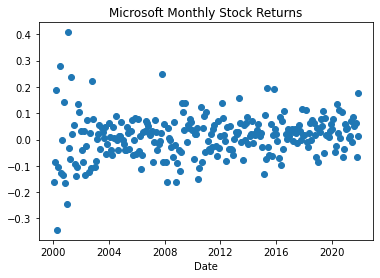

In [55]:
plt.scatter(df.index, df['ret'])
plt.title('Microsoft Monthly Stock Returns')
plt.xlabel('Date')
plt.show()

The magnitudes make sense -- most returns are between -20\% and +20\%. There is a pattern to the volatility, it seems, in that it is higher early in the sample, but otherwise returns look as random as we'd expect. This doesn't guarantee that we calculated them correctly, of course. They're not necessarily right, but they are reasonable or "sane."

Having calculated monthly returns, we next want to cumulate them over time to see how an investment in Microsoft would have done if it was held from Dec 31, 1999 to every subsequent month in our dataset.

You may remember the following formula for cumulative returns:

$1 + R_{t->t+h} = (1 + R_{t+1}) \times (1 + R_{t+2}) \ldots \times (1 + R_{t+h})$

The cumulative gross return from time $t$ to time $t+h$ is the gross return from $t$ to $t+1$, from $t+1$ to $t+2$, etc. until $t+h-1$ to $t+h$. We can implement this exactly:


In [56]:
df['cumulret'] = (df['ret'] + 1).cumprod() - 1
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,ret,cumulret
timestamp,,,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0,NaN,NaN
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0,-0.161714,-0.161714
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0,-0.086851,-0.234519
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0,0.188877,-0.089938
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0,-0.343529,-0.402571


As we can see, the first non-missing cumulative return is the same as the regular return - the Jan 2000 cumulative return from Dec 1999 only includes the Jan 2000 monthly return. But as we keep going, `cumulret` cumulates the successive monthly returns.

There is another way to do this, which will come in handy whenever we do any statistics or econometrics with a time series of returns. To use it, we first need to do a little bit of math. Define the _log return_ to be $r_t = \log(1+R_t)$. This is the same as saying $1+R_t = \exp(r_t)$. Plugging into the definition of the cumulative return above, we see that the cumulative _log_ return $r_{t \rightarrow t+h}$ satisfies

$\exp(r_{t \rightarrow t+h}) = \exp(r_{t+1}) \times \exp(r_{t+2}) \ldots \times \exp(r_{t+h})$

Using the fact that $\exp(a) \exp(b) = \exp(a+b)$ for any $a$ and $b$, we simplify

$\exp(r_{t \rightarrow t+h}) = \exp(r_{t+1} + r_{t+2} \ldots + r_{t+h})$

Taking logs of both sides,

$r_{t \rightarrow t+h} = r_{t+1} + r_{t+2} \ldots + r_{t+h}$

Working with log returns is much easier because cumulative log returns are just sums of individual returns. And sums are easier to calculate, and easier to do statistics with because we know many more properties of sums of random variables than products.

So let's calculate log returns and cumulative log returns. From there, it's easy to get cumulative returns by exponentiating


In [57]:
df['logret'] = np.log(1 + df['ret'])
df['cumullogret'] = df['logret'].cumsum()
df['other_cumulret'] = np.exp(df['cumullogret']) - 1
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,ret,cumulret,logret,cumullogret,other_cumulret
timestamp,,,,,,,,,,,,
1999-12-31,91.06,119.94,90.87,116.75,37.0012,630488900,0.0,NaN,NaN,NaN,NaN,NaN
2000-01-31,117.37,118.62,94.87,97.87,31.0176,637437600,0.0,-0.161714,-0.161714,-0.176396,-0.176396,-0.161714
2000-02-29,98.50,110.00,88.12,89.37,28.3237,667243800,0.0,-0.086851,-0.234519,-0.090856,-0.267251,-0.234519
2000-03-31,89.62,115.00,88.94,106.25,33.6734,1014093800,0.0,0.188877,-0.089938,0.173009,-0.094242,-0.089938
2000-04-28,94.44,96.50,65.00,69.75,22.1056,1129073300,0.0,-0.343529,-0.402571,-0.420877,-0.515119,-0.402571


Note that `df['cumulret'] == df['other_cumulret']`. Both methods produce the same result.

One more note about log returns. Note that the values of `ret` and `logret` are pretty close, especially when `ret` is not too different from zero. This isn't a coincidence. It is generally true that $\log(1+x) \approx x$ when $x \approx 0$.

Why is this the case? Let's do a little bit more math to see. Well, first, consider $x = 0$. Then $\log(1+x) = \log(1) = 0$. So the approximaton holds exactly at zero. What about small deviations away from 0. We know that for a function $f(x)$ small changes in $f$ as you change $x$ near some number $x_0$ are approximated by the derivative $f'(x_0)$:

$f(x) \approx f(x_0) + f'(x_0) (x-x_0)$

Taking the derivative,

$f'(x) = \frac{1}{1+x}$

Plugging in $x=1$, we see that $f'(1) = 1$. So we've learned that in the neighborhood of $x=0$, $\log(1+x)$ changes 1 for 1 with $x$. Therefore, in the neighborhood around 0, $\log(1+x) \approx 0 + 1 \times x = x$.

Just in case you don't believe the calculus/algebra, let's see it in a plot:


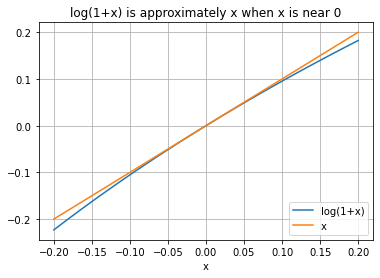

In [58]:
xvec = np.linspace(-0.2, 0.2, 100)
plt.plot(xvec, np.log(1 + xvec), label='log(1+x)')
plt.plot(xvec, xvec, label='x')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.grid(True)
plt.title('log(1+x) is approximately x when x is near 0')
plt.show()

Because most stock returns fall in this range, we will often refer to returns and log returns interchangeably. So I may refer to a log return of -0.1 as a return of -10%. It's not exactly true, but it's close enough.

Let's clean up a bit.


In [59]:
del xvec
df.drop(columns='other_cumulret', inplace=True)


We can now assess Microsoft's performance by plotting cumulative returns. We can make this plot the familiar way i.e. `plt.plot(df.index,df['cumulret'])` and subsequently set axis labels, etc. But there's an even easier way:


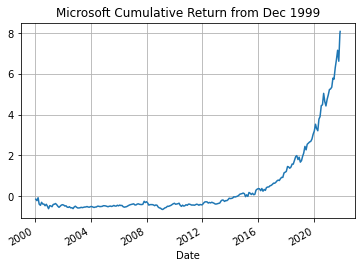

In [60]:
df['cumulret'].plot(grid=True,
                    xlabel='Date',
                    title='Microsoft Cumulative Return from Dec 1999')


Let's change this plot in three ways. First, let's plot the cumulative return in percent. Second, let's make the date in the title dynamic so that if we ever get a different sample that starts at a different date, the title will still be correct. Third, let's add a horizontal line at zero so we can easily see times in which our investment would have been profitable vs. loss-making:


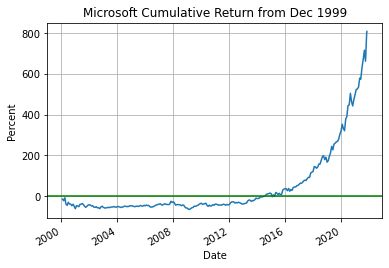

In [61]:
(100 * df['cumulret']).plot(grid=True,
                            xlabel='Date',
                            ylabel='Percent',
                            title='Microsoft Cumulative Return from %s' %
                            df.index[0].strftime('%b %Y'))
plt.axhline(y=0, color='g')


This is a pretty striking result. If we had invested in Microsoft in December 1999, we would not have made any money until... 2015! But if we had invested in Microsoft in 2015, over 6 years we would have made an 800% return, converting every \\$1 of investment into \\$9!

Plotting is one useful way of analyzing the data. Looking at summary statistics is another, and that is what we will do next.

## Summary Statistics

Recall the many statistical functions we can apply to `ndarrays`: `np.mean()`, `np.std()`, etc. Most have `pandas` equivalents, and we can run them one at a time to compute the mean, standard deviation, etc. of our columns of interest. But there is a quicker way to get a bunch of summary statistics at once:


In [62]:
df[['ret', 'logret']].describe()


,ret,logret
count,263.000000,263.000000
mean,0.011789,0.008389
std,0.082364,0.082189
min,-0.343529,-0.420877
25%,-0.037291,-0.038004
50%,0.017244,0.017097
75%,0.055697,0.054201
max,0.407556,0.341855


We selected the two columns we're interested in -- returns and log returns -- and `describe()`d them to get the number of observations (`count`), mean, standard deviation (`std`), extrema (`min` and `max`), and a few key percentiles.

We find that Microsoft's monthly returns have had about 8.2% volatility and a mean of... either 1.17% or 0.84%, depending on which column you look at. So which column should it be?

Like with any statistic, the answer depends on the question you are asking. If someone asks you what the average return for Microsoft has been, you should clarify -- why do you want to know? Typically, someone is interested in historical stock returns because they want to gauge how much money they could have or can make. Maybe the person asking you is interested in how much they could expect to make over the next month if they invested in Microsoft today and the probability distribution of its returns remained unchanged. This question is best answered by looking at the first column of simple `ret`urns -- about 1.17%.

But, more commonly, one wants to know the average return because they would like to know much they would earn on average per month if they held the investment for a while. Another way of asking this question is: if I invested a risk-free investment that delivered the same return every month, what would that return need to be for me to earn the same amount as if I had invested in Microsoft stock?

The answer to that question is **not** 1.17%. To see why, consider investing \\$100 in a hypothetical (very risky!) stock and holding the stock for two months. In the first month, the stock experiences a 50\% return. In the second month, it experiences a -50\% return. The *arithmetic average* return is $(0.5 - 0.5) / 2 = 0$. The cumulative return over two months, however, is $(1 + 0.5) \times (1 - 0.5) -1 = -0.25$ or -25\%. At the end of the first month, your investment is worth \\$150, so the negative 50\% return in the second month is applied to a bigger base. The same 50\% change loses you \\$75 instead of \\$50.

An equivalent risk-free investment would need to earn $x$ every month to deliver a cumulative return of $(1+x)^2-1=-0.25$. Solving for $x$, we get $x = 1-(1-0.25)^\frac{1}{2}=-0.134$ or -13.4\% per month.

So the answer to "if I invested a risk-free investment that delivered the same return every month, what would that return need to be for me to earn the same amount as if I had invested in this stock" is the _geometric mean_ of -13.4\%. not 0\%!

The geometric mean of returns $R_{t+1}, R_{t+2}, \ldots, R_{t+h}$ is defined as

$ 1 + \bar{R}_{t\rightarrow t+h}^{geom} \equiv \left[ (1+R_{t+1}) (1+R*{t+2}) \ldots (1 + R*{t+h}) \right]^\frac{1}{h} $

This looks messy, but log returns come to the rescue. Plugging in the definition of log returns and doing some math, we get

$ 1 + \bar{R}_{t\rightarrow t+h}^{geom} = \exp( \frac{r_{t+1} + r*{t+2} \ldots + r*{t+h}}{h} )$

Look at the expression inside $\exp()$. This is just the regular arithmetic mean of log returns, which we can denote $\bar{r}_{t \rightarrow t+h}$. So the geometric mean of returns is just an exponentiated version of the arithmetic mean of log returns. And since we know that $\log(1+x) \approx x$ for $x \approx 0$ (which _mean_ log returns usually are), the geometric mean is very well approximated by the arithmetic mean of log returns.

This is why the second column in our table of summary statistics is useful. Let's use the mean log return to compute the geometric mean exactly:


In [63]:
summary_stats = df[['ret', 'logret']].describe()
print('Mean Returns (in percent)')
print('Arithmetic Mean Return:     %0.5f' %
      (100 * summary_stats.loc['mean', 'ret']))
print('Arithmetic Mean Log Return: %0.5f' %
      (100 * summary_stats.loc['mean', 'logret']))
print('Geometric Mean Return (1):  %0.5f' %
      (100 * (np.exp(summary_stats.loc['mean', 'logret']) - 1)))
print(
    'Geometric Mean Return (2):  %0.5f' %
    (100 *
     ((1 + df['cumulret'][-1])**(1 / summary_stats.loc['count', 'ret']) - 1)))


Mean Returns (in percent)
Arithmetic Mean Return:     1.17892
Arithmetic Mean Log Return: 0.83891
Geometric Mean Return (1):  0.84244
Geometric Mean Return (2):  0.84244


Note that the two methods of computing the geometric mean -- using log returns and directly -- produce identical results. The mean log return is very close to the geometric mean -- enough that, again, we can use them interchangeably. And all are substantially lower than the mean return.

In fact, the geometric mean is **always** lower than the arithmetic mean, and this difference increases in volatility. This is why unscrupulous asset managers want to advertise the arithmetic mean of their strategies. This way, to naive investors they can seem to offer large returns while actually all they're doing is offering more risk for the same return.

### Aside: The Distribution of Log Returns

In other classes, you may have assumed, or will assume, that returns are log-normally distributed, or, in other words, log returns are normally distributed. One nice property of the normal family of distributions is that any normal distribution is fully described by two parameters identifying its mean and standard deviation. So if log returns are indeed normally distributed, then the mean and standard deviation estimated above fully describe their distribution.

We can check if this is the case. Let us plot, on the same plot, two probability density functions (pdfs). The first will be the pdf of the normal distribution with a mean of 0.0083891 and a standard deviation of 0.082189, the statistics for log returns in our sample. The second will be a histogram of the data, scaled to resemble a pdf.


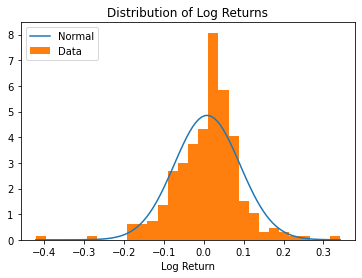

In [64]:
from scipy.stats import norm

ss = summary_stats['logret']
rvec = np.linspace(ss['min'], ss['max'], 100)
plt.plot(rvec, norm.pdf(rvec, ss['mean'], ss['std']), label='Normal')
plt.hist(df['logret'], bins=30, density=True, label='Data')
plt.xlabel('Log Return')
plt.legend(loc='upper left')
plt.title('Distribution of Log Returns')
plt.show()

Notice that the data doesn't look _that_ normally distributed. Sure, the overall pattern is there -- there is a single peak and most of the mass of the distribution is clustered around that peak. But it's not very symmetric, and extreme returns, whether positive or negative, occur more often than the normal distribution would suggest. Later in this course, when we discuss modeling stock returns, we will explore ways to relax the assumption of normality.


### Aside: Adding Stats to `DataFrame.describe()`

Sometimes, there are other statistics we would like to see in addition to count, mean, std.dev., and percentiles. For instance, with financial time series we are often interested in their autocorrelation. And to evaluate the non-normality of returns, we may want to report the sample's skewness or kurtosis. There is no argument of `DataFrame.describe()` that allows us to add stats. But we can write our own function that "wraps" `DataFrame.describe()` and augments its output with additional statistics.


In [65]:
def describe(df, stats):
    ss = df.describe()
    addl = df.agg(stats)
    return pd.concat([ss, addl]).drop_duplicates()


describe(df[['ret', 'logret']], ['autocorr', 'skew'])


,ret,logret
count,263.000000,263.000000
mean,0.011789,0.008389
std,0.082364,0.082189
min,-0.343529,-0.420877
25%,-0.037291,-0.038004
50%,0.017244,0.017097
75%,0.055697,0.054201
max,0.407556,0.341855
autocorr,-0.154094,-0.129494
skew,0.215578,-0.440549


The `describe()` function takes two arguments -- a `DataFrame` and a `list` of statistics in the format that `DataFrame.agg()` expects. We take advantage of the fact that `DataFrame.describe()` is already essentially a shorthand for `agg` -- a really useful `pandas` function that produces summary statistics. We can think of `DataFrame.describe()` as calling `DataFrame.agg()` with a specific pre-specified list of statistics. We are just adding a few more and `DataFrame.concat()`enating the two sets of summary statistics together. The last part -- `.drop_duplicates()` -- just deals with the possibility that we accidentally asked for a statistic that `DataFrame.describe()` already outputs.


## Constructing a Portfolio

Usually, we don't just want to analyze one stock at a time. Rather, we want to compare the returns of multiple assets and construct portfolios.

Many data providers will make historical stock data for multiple companies available in one table. Let's import such a table and take a look.


In [66]:
stockdata = pd.read_csv('data/stockdata.csv', parse_dates=['timestamp'])
display(stockdata)

,ticker,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,C,2021-10-29,70.44,73.725,68.740,69.16,69.1600,379877026,0.51
1,C,2021-09-30,72.36,73.280,65.965,70.18,69.6663,409805625,0.00
2,C,2021-08-31,67.95,74.640,66.890,71.91,71.3836,350633101,0.00
3,C,2021-07-30,71.08,71.210,64.360,67.62,67.1250,427803836,0.51
4,C,2021-06-30,79.49,80.290,67.130,70.75,69.7064,518543105,0.00
...,...,...,...,...,...,...,...,...,...
3144,XOM,2000-04-28,77.75,83.130,75.000,77.69,20.0828,100710000,0.00
3145,XOM,2000-03-31,75.38,82.000,72.000,78.00,20.1629,139872700,0.00
3146,XOM,2000-02-29,83.31,84.880,69.880,75.31,19.4676,110523100,0.44
3147,XOM,2000-01-31,79.50,86.310,76.500,82.88,21.3015,125301100,0.00


Relative to how Microsoft's table looked, we see a new column at the beginning -- `ticker` -- indicating which company's information the row ("obsetvation") contains. It identifies the observation along with `timestamp`. If we just knew that the stock return is from August 2021, that wouldn't tell us enough information. Is it the August return for C (Citi) or for XOM (Exxon Mobil)? Every observation in this data -- every closing price, dividend amount, etc. -- has two _dimensions_: a ticker and a month. Both are necessary to identify it. Such two-dimensional data is sometimes called _panel_ data if one of the dimensions is time, like it is here.

There are two different ways to store such two-dimensional observations. The format above contains a separate row for every combination of `ticker` and `timestamp` for which we have data. In other words, every obseration has its own row. This format is called the _long_ format. An alternative _wide_ format would use rows to identify one dimensions -- e.g. month -- and use columns to identify the other dimension -- ticker. It would look something like this:


In [67]:
stockdata.pivot(index='timestamp', columns='ticker', values='adjusted close')


ticker,C,CSCO,GE,HD,IBM,INTC,MRK,MSFT,ORCL,T,WMT,XOM
timestamp,,,,,,,,,,,,
1999-12-31,NaN,39.2481,219.9107,44.5245,63.3510,25.2140,28.6654,37.0012,23.7312,14.4680,46.6625,20.7052
2000-01-31,NaN,40.1276,190.4235,36.6752,65.9234,30.3083,33.5461,31.0176,21.1485,12.7968,36.9560,21.3015
2000-02-29,NaN,48.4463,188.1214,37.2386,60.4051,34.6252,26.2635,28.3237,31.4370,11.2658,32.9061,19.4676
2000-03-31,NaN,56.6624,221.8210,41.8039,69.5878,40.4165,26.6348,33.6734,33.0501,12.5730,38.1817,20.1629
2000-04-28,NaN,50.8136,224.1300,36.6190,65.5490,38.8538,29.7942,22.1056,33.8461,13.1455,37.4248,20.0828
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,69.7064,52.2796,107.5971,317.2725,138.5349,55.3977,77.0752,270.3792,77.2968,27.7263,140.5016,62.1374
2021-07-30,67.1250,54.9948,103.5202,326.5253,133.2143,53.0097,76.1833,284.3623,86.8456,27.5217,142.0260,56.7097
2021-08-31,71.3836,58.6200,105.3288,324.5255,134.1683,53.6892,75.6085,301.8800,88.8289,26.9036,148.1000,54.5200


When you want to look at the data, the wide format seems more appealing. You can easily scan across a row and see what the stock prices were for different companies on a given day.

But as a way of storing and manipulating data, wide format has a few shortcomings. Notice that it can only store one piece of information for every company-date. The above table displays the adjusted closing price. What if we also wanted to know the volume? We'd need another table -- we're already using rows to identify dates and columns to identify tickers so we don't have another dimension to identify variable i.e. adjusted close or volume.

Suppose we wanted to find out the total dollar amount traded that day, approximately equal to close \* volume. With long data, it would just be a matter of multiplying the two columns. But with wide format data, we'd need to have two tables, ensure that the order of dates and tickers is exactly the same, and then multiply their entire contents by each other. There are lots more opportunities to make a mistake here!

Other shortcomings are additional difficulties in performing the same operation for every ticker, and "wasted space" created by imposing a balanced structure on potentially unbalanced data. For example, notice the `NaN` (not-a-number, or missing) values for the first few months of C. That's because we don't have data for Citigroup's stock prices for those months. Our panel is _unbalanced._ In the long data, those rows are just missing. But wide data is inherently a balanced representation, so we end up with these `NaN`s.

For these reasons, we will work with long format data. Since rows are uniquely identified by the combination of `ticker` and `timestamp`, we will make both columns part of a `MultiIndex`.


In [68]:
stockdata.sort_values(['ticker', 'timestamp'], inplace=True)
stockdata.set_index(['ticker', 'timestamp'], inplace=True)


To access data that has a multi-column index, we need to specify the value of both columns. For instance, to get the adjusted closing price of Citi on July 30, 2021, we type


In [69]:
stockdata.loc[('C', pd.Timestamp(2021, 7, 30)), 'adjusted close']


67.125

grouping the two values with parentheses.

When working with long data, we usually want to perform some operations by group. For example, we want to construct a portfolio return from all stocks on a given months, or perhaps find the maximum stock price for a given ticker across all months. We may also want to compute returns as ratios of two sequential prices, of course making sure that we don't divide the first price of one ticker by the last price of another.

These operations are part of what data scientists call the Split-Apply-Combine workflow. You split the datasets into groups (e.g. by date, or by ticker), you perform some operation for each group, and then you combine it back together.

We will see two types of "apply" operations. One type is aggregating (or summarizing) operations, that produce one observation/row for each group. The other is transform operations, that produce the same number of rows/observations as there were in the original data.

How many stocks do we have? To find out, let's see how many unique elements of the `ticker` component of the index there are.


In [70]:
stockdata.index.unique(level='ticker').size

12

But -- be careful! That there are 12 stocks total doesn't mean that there are 12 stocks for every date. We've already seen that this panel is unbalanced and Citigroup's stock prices are missing for a few months. Since we want to form a portfolio of all 12 stocks, let us restrict our sample to the period for which we have all observations. To do this, we need to find out when the data for each stock starts and ends.

We will first group observations by `ticker`, then find the minimum and mazimum date for each group, and combine back into one dataset. This is an example of an aggregation -- the `min` and `max` functions return one number per group -- their minimum and maximum values, respectively.


In [71]:
stockdata['date'] = stockdata.index.get_level_values('timestamp')
stockdata[['date']].groupby('ticker').aggregate(['min', 'max'])


date           
              min        max
ticker                      
C      2000-07-31 2021-10-29
CSCO   1999-12-31 2021-10-29
GE     1999-12-31 2021-10-29
HD     1999-12-31 2021-10-29
IBM    1999-12-31 2021-10-29
INTC   1999-12-31 2021-10-29
MRK    1999-12-31 2021-10-29
MSFT   1999-12-31 2021-10-29
ORCL   1999-12-31 2021-10-29
T      1999-12-31 2021-10-29
WMT    1999-12-31 2021-10-29
XOM    1999-12-31 2021-10-29

We see that for all but one company, data starts in Dec 1999 and goes to Oct 2021. The exception is Citi, for which the data only starts on July 31, 2000 (by the way, if you're curious why that is, the reason is pretty boring -- I deleted the first few months of Citi data specifically to force us to run into this issue :) ).

So we want to keep only the sample from July 2000 to Oct 2021, or, in other words, from the latest min date until the earliest max date. Of course, this method isn't full-proof if there are missing months in the middle, but that almost never happens with stock price data for large companies.

We will do this in two steps. First, we will identify the start and the end dates of the sample based on the rule described above.


In [72]:
stockdata['date'] = stockdata.index.get_level_values('timestamp')
dateranges = stockdata[['date']].groupby('ticker').aggregate(['min', 'max'])
start_date = max(dateranges[('date', 'min')])
end_date = min(dateranges[('date', 'max')])
stockdata.drop('date', axis=1, inplace=True)


Then, we will filter observations from `stockdata` that are between the start and end dates and store them in a new dataframe. Selecting rows by date indices was straightforward when dates were the only index in our Microsoft dataset. But now that there are multiple variables in an index (both `ticker` and `timestamp`), the following wouldn't work:

`stockdata.loc[start_date:end_date,:]`

because it is not obvious whether `start_date` and `end_date` are slicing `timestamp` or `ticker`. To select rows based on elements of a `MultiIndex`, we need to use the `IndexSlice` object:


In [73]:
stockdata = stockdata.loc[pd.IndexSlice[:, start_date:end_date], :]


It allows us to specify that we would like all `tickers` (the first colon) and only `timestamps` between `start_date` and `end_date`.

Next, let's calculate returns. With one stock and data sorted by date, we saw that we can calculate returns by taking the ratios of successive adjusted closing prices using the `shift` method of a series. That worked because we made `timestamp` the index i.e. the column that uniquely identifies each row.

With multiple stocks, we can't do the exact same thing. To see why, consider the following block of rows in the data.


In [74]:
stockdata.iloc[253:259]

open    high     low  close  adjusted close      volume  \
ticker timestamp                                                              
C      2021-08-31  67.95  74.640  66.890  71.91         71.3836   350633101   
       2021-09-30  72.36  73.280  65.965  70.18         69.6663   409805625   
       2021-10-29  70.44  73.725  68.740  69.16         69.1600   379877026   
CSCO   2000-07-31  63.38  69.750  60.880  65.44         47.9626   736369500   
       2000-08-31  64.75  70.000  58.500  68.63         50.3006   943606900   
       2000-09-29  68.88  69.630  54.630  55.25         40.4941  1098540700   

                   dividend amount  
ticker timestamp                    
C      2021-08-31             0.00  
       2021-09-30             0.00  
       2021-10-29             0.51  
CSCO   2000-07-31             0.00  
       2000-08-31             0.00  
       2000-09-29             0.00

If we shift `adjusted close` by 1, we will compute a July 2000 return for CSCO to be CSCO's July 2000 `adjusted close` divided by C's October 2021 `adjusted close`. That's clearly wrong! To avoid this problem, we need to first group our data by `ticker` and only then `shift`:


In [75]:
stockdata['ret'] = stockdata['adjusted close'] / \
    stockdata.groupby('ticker')['adjusted close'].shift(1) - 1
stockdata.iloc[253:259]

open    high     low  close  adjusted close      volume  \
ticker timestamp                                                              
C      2021-08-31  67.95  74.640  66.890  71.91         71.3836   350633101   
       2021-09-30  72.36  73.280  65.965  70.18         69.6663   409805625   
       2021-10-29  70.44  73.725  68.740  69.16         69.1600   379877026   
CSCO   2000-07-31  63.38  69.750  60.880  65.44         47.9626   736369500   
       2000-08-31  64.75  70.000  58.500  68.63         50.3006   943606900   
       2000-09-29  68.88  69.630  54.630  55.25         40.4941  1098540700   

                   dividend amount       ret  
ticker timestamp                              
C      2021-08-31             0.00  0.063443  
       2021-09-30             0.00 -0.024057  
       2021-10-29             0.51 -0.007268  
CSCO   2000-07-31             0.00       NaN  
       2000-08-31             0.00  0.048746  
       2000-09-29             0.00 -0.194958

This got the job done. The July 2000 return on Cisco stock is correctly missing (b/c we don't have June 2000 prices in the dataset).


We are now ready to _construct a portfolio._ When working with historical data, this term just means -- assign portfolio weights (fractions of our overall investment that we allocate into each stock) and use those weights to calculate the historical return on this portfolio.

Let's start with a simple portfolio -- an equal-weighted (EW) portfolio, that invests 1/12th of the funds into each of the 12 stocks. In other words, the portfolio weight on each stock is 1/12, adding up to 1. We will compute its return as a weighted average of individual stock returns and then compute the portfolio log return.

We again employ the split-apply-combine workflow. But this time, we split the data by `timestamp` instead of by `ticker`. For every `timestamp`, we will aggregate the returns on all 12 stocks into one number -- the portfolio return.

Let's see a few ways to do this, going from easiest (and least general) to most general.

First, we can take advantage of the fact that the return on an equal-weighted portfolio of N stocks is just their mean return:
$R_{EW} \equiv \sum_{i=1}^N \frac{1}{N} R_i = \frac{\sum_{i=1}^N R_i}{N} \equiv \bar{R}$


In [76]:
ew = stockdata[['ret']].groupby('timestamp').mean()
display(ew)

,ret
timestamp,
2000-07-31,NaN
2000-08-31,0.047920
2000-09-29,-0.056575
2000-10-31,-0.003287
2000-11-30,-0.065720
...,...
2021-06-30,0.006247
2021-07-30,0.000372
2021-08-31,0.018273


Of course, this only works for an equal-weighted portfolio. What if the weights are not equal? Let us construct a long-short portfolio, where long (positive) positions in some stocks were funded by short (negative) positions in other stocks. This is one of the most common hedge fund investment strategies.

Suppose that an investor in July 2000 believed that tech stocks will significantly outperfrom non-tech stocks. So she decided to take equal positions in Microsoft (MSFT), Cisco (CSCO), Intel (INTC), Oracle (ORCL), and IBM (IBM), while taking short positions in Citi (C), GE (GE), Home Depot (HD), MRK (Merck), T (AT&T), WMT (Walmart), and XOM (ExxonMobil)?

The weights on the long "leg" of a portfolio are positive and add up to 1. The weights on the short "leg" of a portfolio are negative and add up to -1. Since we have 5 stocks in the long leg and 7 stocks in the short leg, the weights in the long leg are 1/5 on each stock and the weights in the short leg are -1/7 on each stock.

Let's construct a `Series` of weights:


In [77]:
lsweights = pd.Series(0.0, index=stockdata.index.unique(level='ticker'))
lsweights[['MSFT', 'CSCO', 'INTC', 'ORCL', 'IBM']] = 1 / 5
lsweights[['C', 'GE', 'HD', 'MRK', 'T', 'WMT', 'XOM']] = -1 / 7
display(lsweights)

ticker
C      -0.142857
CSCO    0.200000
GE     -0.142857
HD     -0.142857
IBM     0.200000
INTC    0.200000
MRK    -0.142857
MSFT    0.200000
ORCL    0.200000
T      -0.142857
WMT    -0.142857
XOM    -0.142857
dtype: float64

To construct our long-short portfolio, we will, for each `timestamp`, multiply a given `ticker`'s weight by its return in that month, and then add up the products. To do this, we will define a function that takes a series of returns and computes the portfolio return given the weights. Will then use this function to aggregate our grouped data:


In [78]:
def lssum(returns):
    return sum(lsweights * returns)


ls = stockdata[['ret']].groupby('timestamp').agg(lssum)
display(ls)

,ret
timestamp,
2000-07-31,NaN
2000-08-31,0.109086
2000-09-29,-0.265419
2000-10-31,-0.024321
2000-11-30,-0.119982
...,...
2021-06-30,0.016076
2021-07-30,0.049308
2021-08-31,0.027076


Let's combine both portfolios into the same long dataframe with the same index structure as the original data. In other words, we will assign "tickers" to these portfolios -- EW for the equal-weighted one, and LS for the long-short one:


In [79]:
portfolios = pd.concat([ew, ls], keys=['EW', 'LS'], names=['ticker'])
display(portfolios)

ret
ticker timestamp           
EW     2000-07-31       NaN
       2000-08-31  0.047920
       2000-09-29 -0.056575
       2000-10-31 -0.003287
       2000-11-30 -0.065720
...                     ...
LS     2021-06-30  0.016076
       2021-07-30  0.049308
       2021-08-31  0.027076
       2021-09-30 -0.033028
       2021-10-29 -0.035054

[512 rows x 1 columns]

We can combine these portfolio returns with our original data, and define log returns:


In [80]:
returns = pd.concat([stockdata[['ret']], portfolios])
returns['logret'] = np.log(1 + returns['ret'])
display(returns)

ret    logret
ticker timestamp                     
C      2000-07-31       NaN       NaN
       2000-08-31  0.106471  0.101175
       2000-09-29 -0.074157 -0.077050
       2000-10-31 -0.026452 -0.026808
       2000-11-30 -0.051085 -0.052436
...                     ...       ...
LS     2021-06-30  0.016076  0.015948
       2021-07-30  0.049308  0.048131
       2021-08-31  0.027076  0.026716
       2021-09-30 -0.033028 -0.033586
       2021-10-29 -0.035054 -0.035684

[3584 rows x 2 columns]

We would like to see a few summary statistics -- the mean log return, its volatility, and its autocorrelation -- for each stock. Yet again, we will group the data -- this time the log return -- by `ticker`, aggregate it, and combine the result back into one dataset.

For common functions like mean and standard deviations, there are predefined string function names 'mean' and 'std'. But really, we can pass in any function as long as it takes a Series as an argument and returns a scalar as a result. Here, for autocorrelation, we will use the `autocorr` method of the `Series` class.


In [81]:
stats = returns[['logret'
                 ]].groupby('ticker').agg(['mean', 'std', pd.Series.autocorr])
display(stats)

logret                    
            mean       std  autocorr
ticker                              
C      -0.006045  0.127821  0.140381
CSCO    0.000605  0.097566 -0.019827
EW      0.005089  0.049272  0.021478
GE     -0.002934  0.086506  0.174621
HD      0.009430  0.070928  0.005123
IBM     0.002327  0.071724 -0.137711
INTC    0.000680  0.100099 -0.078067
LS      0.000526  0.054150 -0.135643
MRK     0.004114  0.067183 -0.077636
MSFT    0.010617  0.074825 -0.105863
ORCL    0.004326  0.088762  0.032993
T       0.002652  0.063261 -0.043164
WMT     0.005434  0.052307 -0.115521
XOM     0.004429  0.059814  0.018024

This looks pretty good, but we can improve it in several ways. First, it's a little bit unwieldy to have the two-level column name. If we wanted to extract the mean return of Microsoft, we would need to type in


In [82]:
stats.loc['MSFT', ('logret', 'mean')]


0.01061686126838709

This can be handy if we're summarizing multiple variables and thus need to specify both the variable being summarized and the aggregating function. But since here we're only summarizing logreturns, it would be easier to just have a single-level of labels: mean, std, etc.


In [83]:
stats = stats.droplevel(0, axis=1)


Second, it's common to report stock returns statistics as annualized (i.e. how much one would earn over the whole year at this rate) and in percent:


In [84]:
PERCENT = 100
MONTHS_PER_YEAR = 12
stats['mean'] = PERCENT * MONTHS_PER_YEAR * stats['mean']
stats['std'] = PERCENT * np.sqrt(MONTHS_PER_YEAR) * stats['std']
display(stats)

,mean,std,autocorr
ticker,,,
C,-7.253874,44.278464,0.140381
CSCO,0.726561,33.797843,-0.019827
EW,6.106395,17.068488,0.021478
GE,-3.521304,29.966443,0.174621
HD,11.315936,24.570190,0.005123
IBM,2.792726,24.845819,-0.137711
INTC,0.815950,34.675175,-0.078067
LS,0.631345,18.757964,-0.135643
MRK,4.936890,23.273035,-0.077636


We see that over the 20 year period there are huge differences between how these stocks performed. Microsoft was the best performer with an average annual log return of 12.7% while Citi was the worst, losing about 7% of its value on average every year. Our best that tech stocks would perform non-tech stocks turned out to be true, but just barely. Long-short portfolio earnes less than 1% per year on average with still substantial volatility of 18.8%. The equal-weighted portfolio does better, earning a 6% average annual return.

In the last part of the code above, we annualized the statistics and converted them to percent. For means, this is straightforward -- just multiply the monthly return by 12 (months in a year). For standard deviations, the square root should be familiar from your statistics and Investments classes. If not, here's a quick refresher.

### Asset Return Statistics

Recall that we defined $r_{t\rightarrow t+1}$ as the log return from time $t$ to time $t+1$, where time $t$ is in units of months. The annual return then is the cumulative return over 12 months:

$r_{y\rightarrow y+1} = \sum_{m=1}^{12} r_{y:m-1\rightarrow y:m}$

For example, the 2019 annual log return is the sum of Jan 2019, Feb 2019, ... Dec 2019 monthly log returns.

Think of each monthly return as a sample from a random variable. Note, here I am assuming that each month's return has the same distribution i.e. that monthly returns are identically distributed. Within a year, this assumption holds quite well in the data. We know the sample mean and standard deviation of monthly returns, which are estimators for the expected value $\mu$ and standard deviation $\sigma$ of the distribution. We can use formulas we know from Statistics to calculate the expected value and standard deviation of the annual return because the annual return is just a sum of identically distributed random variables.

For the expected value, we have

$E[r_{y\rightarrow y+1}] = \sum_{m=1}^{12} E[r_{y:m-1\rightarrow y:m}] = \sum_{m=1}^{12} \mu = 12 \mu$

just like in the code above. To compute the standard deviation, let us first compute the variance:

$\text{Var}[r_{y\rightarrow y+1}] = \text{Var}\left[\sum_{m=1}^{12} r_{y:m-1\rightarrow y:m}\right]$

Recall, generally, it is not true that the variance of a sum of random variables is equal to the sum of their individual variances. Usually, there are covariance terms present. But when it comes to stock returns, we can rely on the Efficient Market Hypothesis to make another assumption -- that stock returns are uncorrelated over time i.e. that knowing the January stock return does not help you predict the February return. This assumption holds well in the data -- notice that the autocorrelations in the table above are usually pretty close to zero.

Under the assumption of no correlations, all the covariances are equal to zero. Only in this case, we can write the variance of a sum as a sum of variances:

$\text{Var}[r_{y\rightarrow y+1}] = \sum*{m=1}^{12} \text{Var}[r*{y:m-1\rightarrow y:m}] = \sum\_{m=1}^{12} \sigma^2 = 12 \sigma^2 $

Standard deviation is the square root of the variance:

$ \text{std}[r_{y\rightarrow y+1}]] = \sigma \sqrt{12} $

which is why we multiplied by `np.sqrt(MONTHS_PER_YEAR)` above.

## Assessing Performance

Let's take another look at the summary statistics, but this time using a mean-variance plot of the type you've seen in your Investment class:


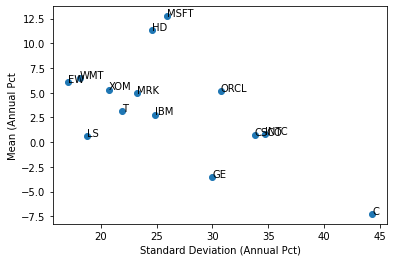

In [85]:
plt.scatter(stats['std'], stats['mean'])
plt.xlabel('Standard Deviation (Annual Pct)')
plt.ylabel('Mean (Annual Pct')
[
    plt.annotate(txt, (x, y))
    for (x, y, txt) in zip(stats['std'], stats['mean'], stats.index)
]
plt.show()

We can see that in general it seems like riskier stocks command higher returns, though there are some significant outliers like GE and especially C. We also see that the asset with the lowest volatility is the equal-weighted portfolio, and the long-short portfolio isn't far behind. This is diversification in action!


But of course to gauge stock performance it's not enough to compare average returns to its volatility. Recall, there is not much reason for investors to care about volatility itself if that volatility is idiosyncratic i.e. if it is not correlated with the volatility of the investors' overall portfolio, which we usually measure using the aggregate market portfolio.

This logic is formalized in the Capital Asset Pricing Model (CAPM), which you learned in your Investments class. Recall that the CAPM states that excess returns (returns in excess of the risk-free rate) of a particular asset are proportional to the excess return on the market. The coefficient of proportionality $\beta_i$ is specific to each asset and is referred to as the asset's beta.

$ E*t[r*{i,t+1}] - r*{f,t} = \beta_i E_t[r*{m,t+1} - r\_{f,t}] $

Since the market excess return is positive on average, the CAPM implies that stocks with higher betas should have higher excess returns. Rather than compare stock returns to volatilities, we should compare stock returns to their betas.

We can estimate an asset's beta by running the following regression for each asset $i$:

$ r*{i,t+1} - r*{f,t} = \alpha*i + \beta_i (r*{m,t+1} - r*{f,t} ) + \epsilon*{i,t+1} $

To do this, we will need two pieces of data that we haven't yet used -- market returns, and risk-free rates, which we will use to compute excess returns. There are many sources for these data, but one easy and free place to get them from is the website of Ken French, a finance professor at Dartmouth and one of the authors of the famous Fama-French model.

There is actually a Python package called `pandas_datareader` that can download these data directly! Before running the cell below for the first time, install it by opening your terminal (on Mac) or CMD.EXE (on Windows, from the Anaconda dashboard) and run `pip install pandas-datareader`.

There are lots of datasets we can download. You can see the full list here: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

or directly using the package's API:


In [86]:
from pandas_datareader.famafrench import get_available_datasets

ffds_names = get_available_datasets()
len(ffds_names)

297

If you want to see their names, print `ffds_names` (it's long!). But we need the one called `'F-F_Research_Data_Factors'`. Let's download it and take a look at the description:


In [87]:
import pandas_datareader.data as pdrweb

kfds = pdrweb.DataReader('F-F_Research_Data_Factors',
                         'famafrench',
                         start='07/31/2000')
print(kfds['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202209 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (267 rows x 4 cols)
  1 : Annual Factors: January-December (22 rows x 4 cols)


As you can see, this dataset actually consists of two `DataFrames` -- one with monthly returns and one with annual returns. Since our individual stock data is monthly, we will use the monthly dataset:


In [88]:
kfdf = kfds[0]
kfdf.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-07,-2.51,-3.06,8.30,0.48
2000-08,7.03,-0.62,-1.38,0.50
2000-09,-5.45,-1.82,7.17,0.51
2000-10,-2.76,-3.87,5.70,0.56
2000-11,-10.72,-3.43,12.32,0.51


This table is indexed by a monthly Date, and has four columns. `Mkt-RF` is the market excess return (market return minus risk-free rate). `RF` is the risk-free rate. The other two columns `SMB` and `HML` contain returns on two long-short portfolios that serve as additional factors in the Fama-French model. We won't be using them today.

The units in this table are unclear, but we can use some common sense and our general knowledge of stock returns and interest rates to figure them out. First, the fact that some returns are smaller than -1 suggests that they are in percent. Remember: limited liability means that you can never lose more than 100% of your investment i.e. experience a worse than -1 return.

Second, despite some of these numbers being quite large, they are in fact monthly un-annualized returns and rates. One way to confirm this is to plot the history of risk-free rates:


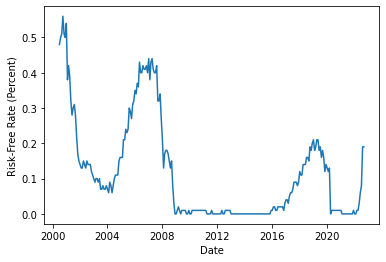

In [89]:
plt.plot(kfdf.index.to_timestamp(), kfdf['RF'])
plt.xlabel('Date')
plt.ylabel('Risk-Free Rate (Percent)')
plt.show()

Note: the `to_timestamp()` function was needed to convert these monthly dates into regular datetime objects that can be plotted. Why did we have to do this? What were they originally? We'll come back to this in a few paragraphs.

Notice that the risk-free rate in 2018-2019 is about 0.2% (or 20 basis points). But we know that the federal funds rate at this time (the most watched interest rate in the economy) was over 2% annually, as it is typically quoted. So 0.2% must be the monthly number (annual / 12).

Finally, we don't know if these returns and rates are already logs. There is no good way to tell, unfortunately. But it is rare for a data provider to supply log returns directly, so let's assume that they are not in logs.

We will want to estimate betas using log returns. So let's convert the Ken French data:


In [90]:
kfdf = np.log(1 + kfdf / 100)
kfdf.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2022-05,-0.003406,-0.018673,0.080750,0.000300
2022-06,-0.088066,0.020685,-0.061556,0.000600
2022-07,0.091393,0.027712,-0.041864,0.000800
2022-08,-0.038533,0.013804,0.003095,0.001898
2022-09,-0.098275,-0.008133,0.000500,0.001898


Now, we want to combine `returns` and `kfdf` so that we can subtract the correct risk-free rate from each of our asset returns to get excess returns. Recall, our `returns` dataframe has one row for each date and ticker. So for example, there are 12 rows corresponding to July 2000 -- one for each company. The data starts in July 2000 and goes until October 2021. In contrast, `kfdf` has only one row for each date, and the date goes through August 2022, almost a year later than `returns`. We have no use for these recent data on risk-free rates and market excess returns, because we don't have the corresponding returns on the assets, whose performance we are trying to assess.

Therefore, our goal is to perform a **many-to-one** **inner join**. Let's talk about each of these terms separately. The "many-to-one" is referring to us merging many rows in `returns` -- 12 for each date -- to one row in `kfdata`. The "inner join" part is referring to the fact that we only want to keep observations for dates present in both tables. If we wanted to keep observations that don't have a match in the other dataset, we would do an **outer join**. If our preference towards keeping or discarding non-matching observations differs by dataset, we can keep them only from the first (left) or the second (right) dataset by doing a left, or right, join respectively.

Before we do this merge, we have another problem to deal with. The the way dates are expressed in the two datasets are different. The index of `returns` is a daily date in `datetime` format. The index of `kfdf`, however, is


In [91]:
type(kfdf.index)

pandas.core.indexes.period.PeriodIndex

Period indices are a really useful `pandas` feature because they allow us to identify dates at a particular frequency, not necessarily daily. This can be very helpful if you want to offset your data by a given number of months, regardless of which month you're starting in.

This is easier to see with an example. Suppose your monthly observation is labeled with a particular date e.g. April 1, 2021. What is one month before then? Well, that depends -- months have different lengths. Do you want to always subtract 31? 30? 28 or 29? If you subtract 31 days from April 1, you get March 1. But if you subtract 31 from March 1, you get a day in January, skipping February altogether! Maybe you want to subtract the correct number of days for a given month e.g. 31 here because March has 31 days?

This gets tricky. And also unnecessary. We don't really care about the day of the month, so why keep track of it and deal with all the associated problems. A `PeriodIndex` allows us to define a monthly date e.g. 2021-04 (April 2021). There are no more days to subtract, just months. One month before is unambiguously March 2021.

So let's convert the `timestamp` level of the index of `returns` to be a monthly `PeriodIndex`. To make this fast, we will extract all unique `timestamp` (second level i.e. `level=1` values; recall: there are many duplicates because we have multiple tickers), convert them to `PeriodIndex` using the `to_period()` method, and then set the second index level to these new values:


In [92]:
returns.index = returns.index.set_levels(
    returns.index.unique(level=1).to_period('M'), level=1)
returns.index.names = [returns.index.names[0], 'Date']
returns.head()

ret    logret
ticker Date                       
C      2000-07       NaN       NaN
       2000-08  0.106471  0.101175
       2000-09 -0.074157 -0.077050
       2000-10 -0.026452 -0.026808
       2000-11 -0.051085 -0.052436

Now that both indices are in the same format, we are now ready to merge/join.


In [93]:
returns = pd.merge(kfdf[['RF']],
                   returns,
                   how='inner',
                   left_index=True,
                   right_index=True)
display(returns)

RF       ret    logret
ticker Date                                 
C      2000-07  0.004789       NaN       NaN
       2000-08  0.004988  0.106471  0.101175
       2000-09  0.005087 -0.074157 -0.077050
       2000-10  0.005584 -0.026452 -0.026808
       2000-11  0.005087 -0.051085 -0.052436
...                  ...       ...       ...
LS     2021-06  0.000000  0.016076  0.015948
       2021-07  0.000000  0.049308  0.048131
       2021-08  0.000000  0.027076  0.026716
       2021-09  0.000000 -0.033028 -0.033586
       2021-10  0.000000 -0.035054 -0.035684

[3584 rows x 3 columns]

With everything in one table, it is easy to compute excess log returns:


In [94]:
returns['exret'] = returns['logret'] - returns['RF']
returns.loc[pd.IndexSlice['LS', :],
            'exret'] = returns.loc[pd.IndexSlice['LS', :], 'logret']
returns.head()

RF       ret    logret     exret
ticker Date                                           
C      2000-07  0.004789       NaN       NaN       NaN
       2000-08  0.004988  0.106471  0.101175  0.096188
       2000-09  0.005087 -0.074157 -0.077050 -0.082137
       2000-10  0.005584 -0.026452 -0.026808 -0.032392
       2000-11  0.005087 -0.051085 -0.052436 -0.057523

To compute excess returns, we subtracted the risk-free rate from all asset log returns except for the long-short portfolio. Why? Well, let's think about what excess returns mean. They are not just the return on an asset in excess of the risk-free rate. It is also the return on an investment strategy, where one borrows a \\$1 at the risk-free rate and invests it in the asset. After a period, one pays back the \\$1 with interest and is left with the excess return as profit.

But a long-short portfolio is self-financing i.e. one does not need to borrow any money to invest in. The short leg is already the borrowing one needs to finance the long leg. So the return on a financed long-short investment strategy is already the long-short return.

We are now (finally!) ready to estimate betas. We will use Ordinary Least Squares (OLS) to do this. There are many ways to run OLS regressions in `python`. In other classes e.g. Linear Econometrics you will learn how to do it using the `statsmodels` package, or maybe the `scikit-learn` package.

Here, since we need to run many univariate regressions, we will use the formula for the univariate OLS coefficient directly. Recall, for a linear model of the type $y_i = a + b x_i + u_i$, the OLS estimate of $b$ is given by $\hat{b} = \frac{ \text{Cov}[x,y]  }{ \text{Var}[x] }$. In our case, $x$ is the market excess return and $y$ is each asset's excess return. So we need to divide the covariance of the asset's return with the market by the variance of the market return.

We can estimate the 14 x 14 covariance matrix of all assets' excess returns -- the market's and the 13 test assets. The first row of this covariance matrix will contain the covariances of each test asset with the market. The first element of the first row will be the covariance of the market return with itself i.e. its variance.

First, let's convert a table of excess returns from long to wide. In addition to `pivot()`, we can use the `unstack()` method for this, which is more appropriate when the variables defining rows and columns are indices:


In [95]:
exrets = returns['exret'].unstack('ticker')
exrets.head()

ticker,C,CSCO,EW,GE,HD,IBM,INTC,LS,MRK,MSFT,ORCL,T,WMT,XOM
Date,,,,,,,,,,,,,,
2000-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08,0.096188,0.042608,0.041820,0.120995,-0.078157,0.158330,0.110252,0.103536,-0.025230,-0.004988,0.185193,-0.023722,-0.153394,0.018352
2000-09,-0.082137,-0.221948,-0.063325,-0.016811,0.091623,-0.164021,-0.593836,-0.308454,0.057986,-0.151367,-0.149010,0.172353,0.006471,0.082462
2000-10,-0.032392,-0.030693,-0.008876,-0.058873,-0.213545,-0.139548,0.073942,-0.024622,0.183563,0.127139,-0.182206,0.144608,-0.064419,-0.004687
2000-11,-0.057523,-0.123150,-0.073066,-0.105776,-0.096854,-0.055883,-0.172150,-0.127813,0.025032,-0.187613,-0.224449,-0.053930,0.134732,-0.013633


Next, let's merge with market excess returns. In addition to `merge()`, we can use the `join()` method:


In [96]:
exrets = exrets.join(kfdf[['Mkt-RF']])

Next, we compute the covariance matrix starting of returns starting with the second row (b/c the first is missing). To get the betas, we divide the covariance with the last column (market excess return) by the variance of the last column:


In [97]:
covariance_matrix = np.cov(exrets.iloc[1:, :].transpose())
betas = covariance_matrix[-1, :] / covariance_matrix[-1, -1]
betas

array([1.93601018, 1.39764314, 0.97846404, 1.15232254, 0.97060202,
       1.00440565, 1.24391618, 0.28413084, 0.49350915, 0.99564851,
       1.13601547, 0.57703429, 0.33533615, 0.71495944, 1.        ])

We take the `numpy` array of betas that we've calculated, convert it into a `pandas` Series, and combine it with summary statistics for each asset, now recomputed for excess returns:


In [98]:
betas = pd.Series(data=betas, index=exrets.columns)
combostats = exrets.agg(['mean', 'std']).transpose()
combostats['mean'] = PERCENT * MONTHS_PER_YEAR * combostats['mean']
combostats['std'] = PERCENT * np.sqrt(MONTHS_PER_YEAR) * combostats['std']
combostats['beta'] = betas
combostats

,mean,std,beta
C,-8.647644,44.290344,1.936010
CSCO,-0.667208,33.868813,1.397643
EW,4.712625,17.119052,0.978464
GE,-4.915073,30.000243,1.152323
HD,9.922166,24.662808,0.970602
IBM,1.398956,24.856132,1.004406
INTC,-0.577820,34.736343,1.243916
LS,0.631345,18.757964,0.284131
MRK,3.543120,23.266571,0.493509
MSFT,11.346464,25.957213,0.995649


Our single-stock estimated betas range from 0.34 for WMT (Walmart) to 1.98 for C (Citigroup, a financial services company). This means that, on average, when the stock market goes up by 1%, Merck's stock goes up by 0.34% while Citi's goes up by 1.98%. EW, the equal-weighted portfolio, has a beta close to 1, which makes sense. The more stock you add to a portfolio, the more it resembles the market. The long-short portfolio LS has the lowest beta of all assets at 0.28. This is the main advantage of long-short strategies. By going long some stocks and short others, they aim to immunize market exposure i.e. to bet on particular stocks while reducing the effect market fluctuations have on portfolio returns.

Higher beta stocks are riskier. According to the CAPM, they should command a higher average excess return. In fact, the CAPM makes an even stronger prediction:

$ E*t[r*{i,t+1}] - r*{f,t} = \beta_i E_t[r*{m,t+1} - r\_{f,t}] $

It says that expected excess returns are _linear_ in betas, and the slope of the line (called the Security Market Line) is the expected excess market returns.

Let's see if this is the case:


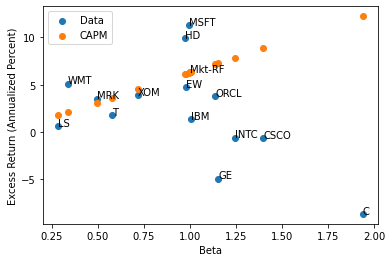

In [99]:
mkt_return = np.mean(exrets['Mkt-RF']) * PERCENT * MONTHS_PER_YEAR
plt.scatter(combostats['beta'], combostats['mean'], label='Data')
plt.scatter(combostats['beta'], combostats['beta'] * mkt_return, label='CAPM')
plt.xlabel('Beta')
plt.ylabel('Excess Return (Annualized Percent)')
plt.legend()
[
    plt.annotate(txt, (x, y))
    for (x, y,
         txt) in zip(combostats['beta'], combostats['mean'], combostats.index)
]
plt.show()

To put it mildly, the CAPM predictions do not hold. If they did, the blue dots would be where the orange dots are. The relationship between betas and excess returns doesn't even appear to be positive, much less linear.

All the work that we did in importing, cleaning, re-arranging, merging and analyzing data proved to be very useful. It showed us that our theory explaining stock returns doesn't do a very good job.

That said, the LS and EW portfolios are pretty close to their CAPM predicted values. Perhaps the CAPM works better for portfolios than individual assets?

## Aside: Investigating the Failure of the CAPM

So why not? There are many reasons, some simpler than others. "Pricing" the cross-section of stock returns i.e. explaining why some stocks have higher returns on average than others is an active ongoing field of financial research. We don't have all the answers yet.

Let's put aside some theoretical reasons for CAPM's failure and focus on the more data-oriented, or empirical, ones. CAPM is written in terms of conditional one-month ahead expectations of stock returns. We don't observe these expectations in the data. Instead, we observe many _realizations_ of stock returns, which consist of an expected part and a surprise. If (1) we have many months of observations, (2) the surprises are that big relative to expectations, and (3) each month's realized return comes from the same distribution, then the surprises mostly cancel out, and the sample average of realized returns is a good estimator of the expected return. In statistics, this is known as the **Law of Large Numbers** (LLN).

Earlier, we said that over short horizons e.g. one year, (3) is a pretty good assumption. The distribution of stock returns, even if it varies, don't vary very fast. But over short horizons, (1) doesn't hold -- there aren't enough observations for LLN to kick in. Over longer horizons, though, expected stock returns may differ. We face a trade-off between (1) and (3). So our best bet is to deal with (2) i.e. to try to find assets for which the surprises are relatively small, such that LLN kicks in faster, and we can use relatively short samples.

What are such such assets? Portfolios! Earlier, we saw the benefits of diversification when we constructed the EW portfolio. Diversification reduces volatility because some stock's surprises get canceled out by others'. Now, of course, if we form very large portfolios that include most stocks, we may get very few surprises but we will also get a beta of 1 for every portfolio. We won't actually be able to see if higher betas are associated with higher returns if all betas are 1. So again, we face a trade-off. We want to include enough stocks in a portfolio that the _idiosyncratic_ (i.e. asset-specific) volatility is low, but not so many as to get rid of the variety in betas.

There is a rich literature on coming up with good _test_ portfolios i.e. portfolios we can use to test the CAPM. Let's try just one approach -- let's group stocks by industry. So rather than looking at Microsoft, Citigroup, and Merck, we'll look at portfolios of tech, financial, and pharma firms.

Luckily for us, Ken French already sorted stocks into portfolios, so we can download these portfolio returns directly.


In [100]:
kfindds = pdrweb.DataReader('49_Industry_Portfolios',
                            'famafrench',
                            start='12/31/2000')
kfinddf = kfindds[0]
kfinddf.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2000-12,12.14,6.12,-4.81,-2.57,17.02,2.35,4.64,10.12,3.15,15.85,...,18.56,2.23,12.93,4.31,2.39,9.97,6.71,3.69,17.07,-1.25
2001-01,6.15,-4.90,2.24,-4.75,0.10,9.94,16.98,2.82,-3.97,3.64,...,7.09,5.66,-1.88,9.95,-3.76,1.95,-10.42,4.51,8.83,-3.85
2001-02,-5.75,1.09,7.22,-6.25,9.48,5.03,-4.86,-0.23,-1.08,-11.70,...,-5.51,-6.67,-4.68,-6.21,-0.04,-4.56,-0.71,1.81,-15.30,1.25
2001-03,2.67,-2.76,-13.25,-9.39,-0.11,-0.82,-9.43,-6.57,-8.86,-1.20,...,-3.47,-1.14,-5.60,-2.03,-5.01,-1.74,-1.04,-1.52,-12.94,-8.01
2001-04,-1.78,-2.01,2.31,-2.20,5.59,-0.13,16.11,5.06,1.77,6.86,...,7.01,3.11,8.17,4.98,6.84,2.76,2.74,3.85,12.84,13.44


Convert to log returns, merge with market/risk-free rate data, and compute excess returns:


In [101]:
kfinddf = np.log(1 + kfinddf / 100)
capmind = kfdf[['Mkt-RF', 'RF']].join(kfinddf, how='inner')
capmind[kfinddf.columns] = capmind[kfinddf.columns].subtract(capmind['RF'],
                                                             axis=0)
capmind.drop('RF', axis=1, inplace=True)


Compute betas and plot:


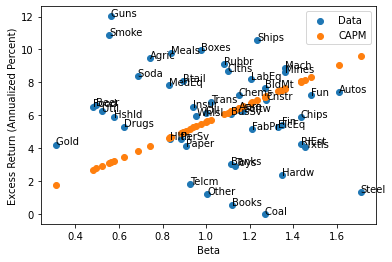

In [102]:
def test_capm(df):
    covariance_matrix = np.cov(df.transpose())
    betas = covariance_matrix[0, 1:] / covariance_matrix[0, 0]
    betas = pd.Series(data=betas, index=df.columns[1:])
    combostats = df.agg(['mean']).transpose()
    combostats['mean'] = PERCENT * MONTHS_PER_YEAR * combostats['mean']
    combostats['beta'] = betas
    plt.scatter(combostats['beta'], combostats['mean'], label='Data')
    plt.scatter(combostats['beta'],
                combostats['beta'] * combostats.loc['Mkt-RF', 'mean'],
                label='CAPM')
    plt.xlabel('Beta')
    plt.ylabel('Excess Return (Annualized Percent)')
    plt.legend()
    [
        plt.annotate(txt, (x, y))
        for (x, y, txt
             ) in zip(combostats['beta'], combostats['mean'], combostats.index)
    ]
    plt.show()


test_capm(capmind)

That doesn't look much better. The relationship between betas and excess returns still looks negative. Maybe the problem is that the sample is too long and unconditional means are poor estimates of conditional means that the CAPM relates to each other. Let's split the sample by decade:


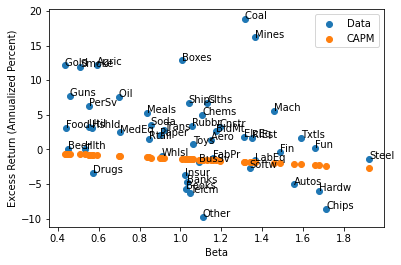

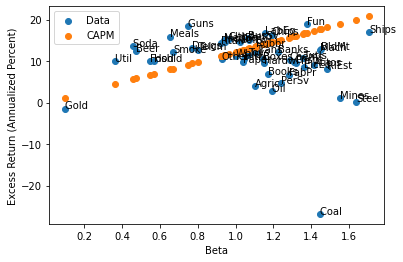

In [103]:
yr = capmind.index.year
test_capm(capmind.loc[(yr >= 2000) & (yr <= 2009)])
test_capm(capmind.loc[(yr >= 2010) & (yr <= 2019)])


The separate plots look a bit better than the combined one, suggesting that maybe we were onto something with time-varying return expectations.

Lastly, let's try the opposite approach. Let's use the longest possible sample:


In [104]:
kflonginddf = pdrweb.DataReader('49_Industry_Portfolios',
                                'famafrench',
                                start='7/31/1926')[0]
kflongdf = pdrweb.DataReader('F-F_Research_Data_Factors',
                             'famafrench',
                             start='7/31/1926')[0]


In [105]:
missing_data_ind = np.any(kflonginddf == -99.99, axis=0)
kflonginddf = kflonginddf.loc[:, ~missing_data_ind]


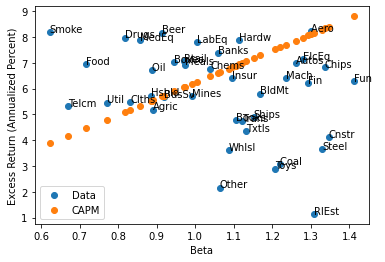

In [106]:
capmindlong = kflongdf[['Mkt-RF', 'RF']].join(kflonginddf, how='inner')
capmindlong = np.log(1 + capmindlong / 100)
capmindlong[kflonginddf.columns] = capmindlong[kflonginddf.columns].subtract(
    capmindlong['RF'], axis=0)
capmindlong.drop('RF', axis=1, inplace=True)

test_capm(capmindlong)

So maybe the problem isn't just empirical after all. It's not just our choice of test assets that is to blame. No matter how hard we try, the CAPM does not do a good job of explaining the cross-section of stock returns.
